In [ ]:
%%capture
!pip install inductiva

In [ ]:
# Run this cell if your working with Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

import inductiva

inductiva.working_dir = "/content/gdrive/MyDrive/demos"

Request your personal key by completing this [form](https://docs.google.com/forms/d/e/1FAIpQLSflytIIwzaBE_ZzoRloVm3uTo1OQCH6Cqhw3bhFVnC61s7Wmw/viewform?usp=sf_link). Add your API key below and you can start simulating right away!

In [ ]:
inductiva.api_key = "YOUR_API_KEY"

# Explore the design space of the simulation

Imagine that you want to change some parameters of the input file or want to do a search on the design space. We here provide a clean way for you to do so.

It is based on creating an input template file and adding in place of the parameter to change a tag.

For the SWASH example, we created a template file based in the input file. It looks as follows:

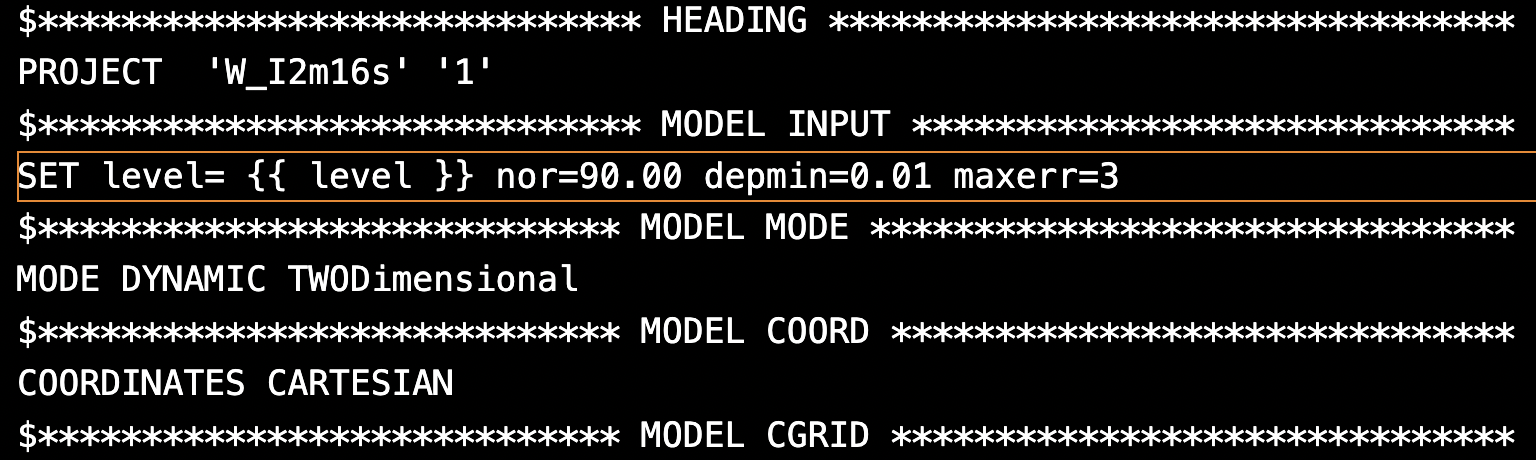

Here, we are able to explore the design space of the `level` parameter! For such, the user adds a tag `{{ level }}` to identify the place where we wants to make a substitution automatically!

## Prepare template files

At this moment in time we allow only iterating over a single file. Hence, the other possible configuration files still serve as input and are contained in the input directory.

The template file introduce before is used to automatically generate the input files and setup many simulations! In the near future it will be possible to send all of these simulations at once and run them all at the same time in parallel. Keep an eye on us for updates!

In [ ]:
# Set the input directories; input files and template file.
input_dir = "config_files/swash"
template_file = "template.sws"

## Setup the exploration space: manually or randomly

To explore a design space we need to setup the parameters required to iterate upon. 

These parameters can established manually if you want to iterate over parameters you already know might be a good option. Or, they can be randomly defined in order to search the design space for the best possible setting.

In [ ]:
import numpy as np

# Manual setup
manual_design_parameters = [3., 3.5, 4., 4.5]

# Randomly set up your design space
random_design_parameters = np.random.uniform(2., 5., 4)
print(random_design_parameters)

## Explore automatically

Let's simply search the design space and wait for the results.

First, we import the `design` module and establish the simulator we want to use.

In [ ]:
from inductiva.design import explore_design_space

sim = inductiva.simulators.SWASH()

#### Manual parameters

In [ ]:
explore_design_space(simulator=sim,
                     input_dir=input_dir,
                     template_filename=template_file,
                     tag="level",
                     values=manual_design_parameters,
                     n_cores=12)


#### Random parameters

In [ ]:
explore_design_space(simulator=sim,
                     input_dir=input_dir,
                     template_filename=template_file,
                     tag="level",
                     values=random_design_parameters,
                     n_cores=12)

In your working directory there is now a folder named `"outputs"` which contains a folder for each of the simulations ran during the exploration.

# Takeway: Simple and fast exploration via Inductiva API